<a href="https://colab.research.google.com/github/SeongwonTak/-KDT-_AI_2_Notes/blob/main/ML/Polynomial_Regression_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programmers DevCourse 보충 : Polynomial Regression and Regularizaiton
참고자료 : https://velog.io/@changhtun1/python-%EC%84%A0%ED%98%95-%ED%9A%8C%EA%B7%80-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%EC%8B%A4%EC%8A%B5

## Polynomial Regression



### Basis Function
비선형의 데이터에 대해서도, 선형 모델을 활용하여 학습시킬 수 있다.?
이는 basis function을 활용하게 된다.

3차 함수의 상황을 예시로 들어보려고 한다.

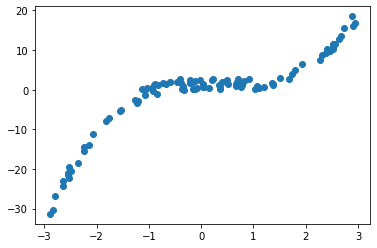

In [66]:
import numpy as np
import matplotlib.pyplot as plt

data_num = 100
x = 6 * np.random.rand(data_num, 1) - 3
y = (x ** 3) - (x ** 2) + 3 * np.random.rand(data_num, 1)
plt.scatter(x, y)
plt.show()

약간의 오차는 있어보이지만, 거의 3차함수이다.
우리가 만든 식은 
$$ f(x) = x ^ {3} - x ^ {2}
이다. 여기에 약간의 Noise를 부여했다.   
(주의! 내가 위에서 x값을 건드린 것은 정의역만 건드린 것이다!)  
이제 점만 주어졌을 때, 이 식을 어떻게 찾아내야할지, 회귀문제를 풀어보자.

### Code

In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3, include_bias = False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])

[0.69370241]
[0.69370241 0.48122303 0.33382558]


poly_features.fit_transform 을 통해 basis를 만들었다.
이제 예측을 진행해보고자 한다.

In [68]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.48724303] [[-0.12307392 -1.01603979  1.01646416]]


이를 해석하면,
$$ 1.01646416x^{3} -1.01603979x^{2} - 0.12307293x + 1.48724303$$
로 예측을 하게 된 것이다. 

실제로 만든 식과는 상수항 정도의 차이로 보이나, rand값이 [0, 1]에서의 균등분포임을 감안하면, 식이 매우 잘 회귀되었음을 알 수 있다.

이를 그림을 통해 확인하면 다음과 같다.

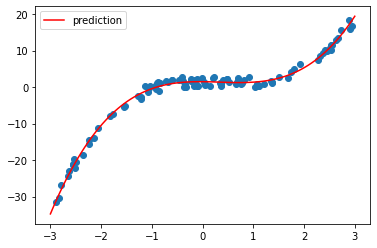

In [72]:
x_new = np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.scatter(x, y)
plt.plot(x_new, y_new, 'r-', label = 'prediction')
plt.legend()
plt.show()

## Regularization

기본적으로 회귀분석은 MSE를 오차함수로 사용한다.
그러나 규제를 통해 과적합을 막아주고자 한다.



### L2 Regularization - Ridge Regularization
각 가중치의 제곱의 합에 규제의 강도를 곱하는 형태이다. 

In [73]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(x, y)
pred = ridge.predict(x)

### L1 Regularization - Lasso Regularization
각 가중치의 절대값의 합을 규제로 한다.
불필요한 회귀 계수를 줄이고, 특성의 선택에 도움을 준다.

In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(x, y)
pred = lasso.predict(x)

규제에 대한 실습은, 다항회귀 example과 함께해야 한다.
E2E 수업 이후 해당 내용을 추가하고자 한다.